In [216]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

%matplotlib inline

In [217]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2018  1734.723214              NaN
1     Afghanistan  2017  1758.465636              NaN
2     Afghanistan  2016  1757.023490              NaN
3     Afghanistan  2015  1766.593077              NaN
4     Afghanistan  2014  1795.735834              NaN
     Country or Area                                      Year        Value  \
6726        Zimbabwe                                      1992  2591.007534   
6727        Zimbabwe                                      1991  2906.272849   
6728        Zimbabwe                                      1990  2819.549467   
6729   footnoteSeqID                                  Footnote          NaN   
6730               2  Excludes South Sudan after July 9, 2011.          NaN   

      Value Footnotes  
6726              NaN  
6727              NaN  
6728              NaN  
6729              NaN  
6730              NaN  


In [218]:
gdp_df.drop(gdp_df.tail(2).index,inplace=True)
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [219]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [220]:
gdp_df.rename(columns = {"Country or Area": "Country"},  
          inplace = True) 

In [221]:
gdp_df.rename(columns = {"Value":"GDP_Per_Capita"},  
          inplace = True) 
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [222]:
gdp_df.shape

(6729, 3)

### Question 7

gdp_df has 6,731 rows and 3 columns

Types:
Country: Object
Year: Object
GDP_Per_Capita: Float

In [223]:
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [224]:
#gdp_df = gdp_df.dropna()
gdp_df['Year'] = gdp_df['Year'].astype(int)

In [225]:
gdp_df.dtypes

Country            object
Year                int32
GDP_Per_Capita    float64
dtype: object

In [226]:
print(gdp_df['Year'].min())
print(gdp_df['Year'].max())

1990
2018


In [227]:
gdp_df['Year'].value_counts().sort_index()


1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

### Question 8
Increases until 2011 then starts to decrease. A drop off in 2018.

In [228]:
gdp_df['Country'].describe()

count      6729
unique      243
top       Italy
freq         29
Name: Country, dtype: object

In [233]:
gdp_df.Country.value_counts()

Italy                        29
Nigeria                      29
Ethiopia                     29
Mali                         29
Guinea-Bissau                29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

### Question 9
Resently became a member of the Un or are a new country.

### Question 9

How many countries are represented in this dataset? 

Which countries are least represented in the dataset? 

Why do you think these countries have so few observations?

In [235]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
print(gdp_2014.head())
gdp_2014.describe()

                 Country  Year  GDP_Per_Capita
4            Afghanistan  2014     1795.735834
21               Albania  2014    10700.993216
50               Algeria  2014    13557.769757
79                Angola  2014     6813.052106
108  Antigua and Barbuda  2014    20440.540555


,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


Text(0, 0.5, 'Number of Countries')

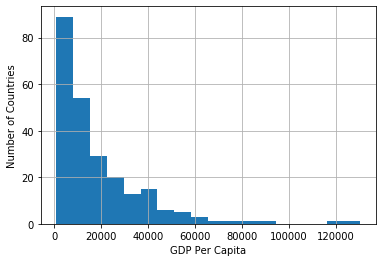

In [237]:
gdp_2014['GDP_Per_Capita'].hist(bins = 18)
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Countries')


### Question 12
Looks like half of a normal distribution that got cut off at zero. Skewed to the right. Mean higher than median.

In [242]:
#13 Top 5 and Bottom 5 in 2014
gdp_2014.groupby('GDP_Per_Capita').min()

,Country,Year
GDP_Per_Capita,,
672.681648,Central African Republic,2014
768.469837,Burundi,2014
784.872656,Dem. Rep. Congo,2014
900.136918,Niger,2014
1142.530804,Malawi,2014
...,...,...
76448.593329,Brunei,2014
81965.361071,Singapore,2014
92349.186429,Luxembourg,2014


In [244]:
#or this works
#gdp_2014.sort_values(by=['GDP_Per_Capita'])


In [263]:
gdp_1990_2017 =gdp_df[gdp_df['Year'].isin([1990,2017])]
print(gdp_1990_2017.head())

        Country  Year  GDP_Per_Capita
1   Afghanistan  2017     1758.465636
18      Albania  2017    11796.719185
45      Albania  1990     4458.247115
47      Algeria  2017    13822.389087
74      Algeria  1990    10300.015042


In [275]:
gdp_pivoted = gdp_1990_2017.pivot_table(values = 'GDP_Per_Capita', index = 'Country',columns = 'Year')

In [276]:
gdp_pivoted = gdp_pivoted.dropna()
print(gdp_pivoted.head())

Year                         1990          2017
Country                                        
Albania               4458.247115  11796.719185
Algeria              10300.015042  13822.389087
Angola                4761.229638   6044.972035
Antigua and Barbuda  17454.549799  22400.379562
Arab World           10491.507721  15542.746104


In [286]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [281]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


In [298]:
gdp_pivoted_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]
gdp_pivoted_negative_sorted = gdp_pivoted_negative.sort_values(by=['Percent_Change'])
gdp_pivoted_negative_sorted


Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
United Arab Emirates,112349.597967,66477.818719,-40.829500
Burundi,1027.396660,670.777072,-34.710993
Yemen,3425.707169,2404.422370,-29.812379
Ukraine,10463.959955,7906.540301,-24.440266
Central African Republic,982.659793,746.434942,-24.039332
Venezuela,14619.454190,11489.648818,-21.408497
Tajikistan,3661.340213,2923.673718,-20.147445
Haiti,2061.842854,1653.001460,-19.828931


### Question 16

20 countries had a negative percent change in GDP.

In [301]:
gdp_pivoted_positive = gdp_pivoted[gdp_pivoted["Percent_Change"] > 500]
gdp_pivoted_positive_sorted = gdp_pivoted_positive.sort_values(by=['Percent_Change'])
gdp_pivoted_positive_sorted


Year,1990,2017,Percent_Change
Country,,,
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
Myanmar,730.228038,5610.324700,668.297629
China,1521.963868,15253.993071,902.257241
Equatorial Guinea,1017.764136,22298.942144,2090.973464


In [303]:
gdp_df_eq_guin = gdp_df[gdp_df['Country']=='Equatorial Guinea']
gdp_df_eq_guin.head()

,Country,Year,GDP_Per_Capita
1691,Equatorial Guinea,2018,20181.132964
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748


TypeError: unhashable type: 'numpy.ndarray'

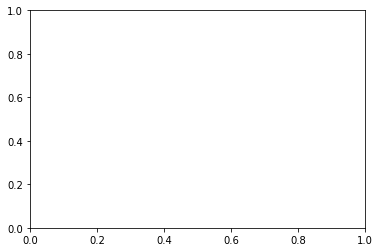

In [304]:
plt.plot(gdp_df_eq_guin)
plt.ylabel('some numbers')
plt.show()


### Question 17
Which country had the highest % change in GDP per capita? Equatorial Guinea

How do the trends in these countries compare?  


### Skipping to #22 For a bit

In [234]:
#internet_df = pd.read_csv("../data/internet_use.csv")[-182]
#print(internet_df.head())
#print(internet_df.tail())